In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-26 / Aki Taanila


## 1/7 Yksinkertainen pylväskaavio

- Jos käytät **pandas*-kirjastoa, niin voin tehdä kaavion **plot**-funktiolla. Käytettävissä on monia kaavioon vaikuttavia parametreja: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html.
- Kaavion luonnin jälkeen voit muotoilla ja täydentää kaaviota **matplotlib.pyplot**-paketin komennoilla. Lue lisää https://matplotlib.org/stable/tutorials/pyplot.html ja https://matplotlib.org/stable/api/pyplot_summary.html.
- Tarvitset usein myös kaavion luonnin palauttamaa **Axes**-luokan oliota kaavion muotoiluun. Lue lisää https://matplotlib.org/stable/api/axes_api.html.

**Seaborn** on matplotlibin päälle rakennettu paketti, joka tekee monista vaikeista asioista helppoja. Tässä muistiossa käytän sitä ainoastaan grafiikan tyylimäärittelyyn.

### Tuonnit ja alkuvalmistelut

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely 'whitegrid' sisältää taustaviivoitukset (grid).
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'.
sns.set_style('whitegrid')

### Datan avaaminen

data1.xlsx sisältää työntekijöiden tietoja.

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Eri koulutuksen suorittaneiden lukumäärät.
df1 = pd.crosstab(df['koulutus'], 'Lkm')
df1.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.columns.name = ''
df1

,Lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


### Vaakapylväskaavio

**Plot**-funktiolla voit luoda eri kaaviolajeja, esimerkiksi pystypylväskaavion **bar** tai vaakapylväskaavion **barh**.

<Axes: >

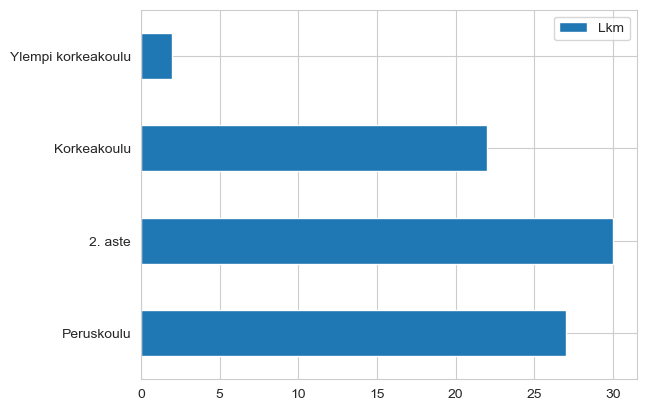

In [5]:
df1.plot(kind='barh')

### Kaavion muotoilua

- Yhden arvosarjan kaavioissa selite on usein tarpeeton, joten piilotetaan se **legend**-parametrilla.
- Kaavion otsikoksi (**title**) 'Koulutusjakauma'.
- Arvoakselin otsikoksi (**xlabel**) 'Lukumäärä'.
- Tyylimäärittelystä tullut vaakasuuntainen taustaviivoitus (**grid**) on tarpeeton.

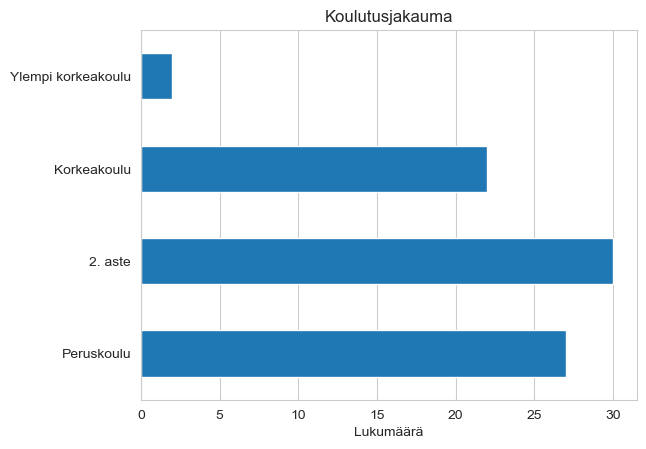

In [6]:
df1.plot(kind='barh', legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

### Hienosäätöä

- Kaavio sijoitetaan **ax**-muuttujan arvoksi, jotta siihen voidaan viitata myöhemmin.
- Kuvion koko **figsize**-parametrilla.
- Pylväiden pituuksia vastaavat lukumäärät pylväiden viereen **bar_label**-funtiolla.
- **padding**-parametrilla lisätään tyhjää tilaa pylvään ja arvon väliin.

[Text(2, 0, '27'), Text(2, 0, '30'), Text(2, 0, '22'), Text(2, 0, '2')]

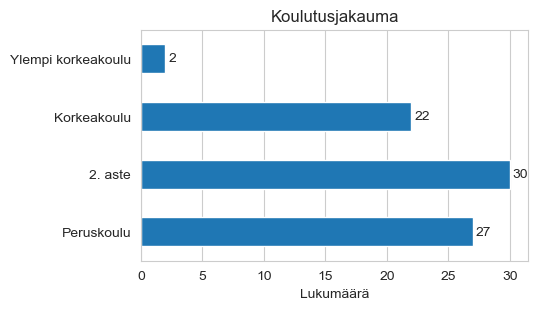

In [7]:
ax = df1.plot(kind='barh', figsize=(5, 3), legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

ax.bar_label(ax.containers[0], padding=2)

### Pystypylväskaavio

Pienin muutoksin voit toteuttaa edellisen pystypylväskaaviona.

Huomaa luokka-akselin otsikoiden 0 asteen kääntö (**rot**) ja pysty-akselin rajojen määritys (**ylim**).

[Text(0, 2, '27'), Text(0, 2, '30'), Text(0, 2, '22'), Text(0, 2, '2')]

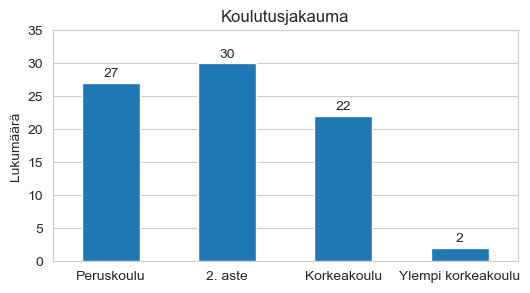

In [8]:
ax = df1.plot(kind='bar', figsize=(6, 3), legend=False, rot=0)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')
plt.grid(axis='x')
plt.ylim(0, 35)

ax.bar_label(ax.containers[0], padding=2)

### Prosenttien esittäminen

In [9]:
# Dataframe, jossa prosentit.
df2 = pd.crosstab(df['koulutus'], 'f')
df2['%'] = df2['f'] / df2['f'].sum() * 100
df2.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df2.columns.name = ''
df2

,f,%
Peruskoulu,27,33.333333
2. aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


#### Hämmentävän monta merkitystä f-kirjaimella

Älä hämmenny vaikka esimerkissä **f**-kirjainta käytetään kolmessa eri merkityksessä.
- Minulla on tapana käyttää frekvenssitaulukon frekvenssisarakkeen otsikkona **f**-kirjainta.
- Pythonin muotoillun merkkijonon (**f-string**) aloitusmerkkinä on aina **f**-kirjain.
- Lukumuotoilussa **f**-kirjain tarkoittaa **float**-tyyppistä lukua.

#### n-arvo

Tekstien lisäämisessä kannattaa opetella käyttämään muotoiltua merkkijonoa (**f-string**). Muotoillussa merkkijonossa voit aaltosulkujen sisällä viitata muuttujan arvoon tai laskutoimituksen tulokseen. Seuraavassa esimerkissä lasketaan df2:n f-sarakkeen lukujen summa ja muunnetaan tulos merkkijonoksi **str**-funktiolla. Jos muotoiltu merkkijono on heittomerkkien välissä, niin et voi käyttää heittomerkkejä merkkijonon sisällä. Sen sijaan voit käyttää lainausmerkkejä. Toisinpäin: jos muotoiltu merkkijono on lainausmerkkien välissä, niin merkkijonon sisällä pitää käyttää heittomerkkejä lainausmerkkien sijasta.

#### Prosenttilukujen muotoilu

Prosenttiluvut muotoillaan muotoilukoodilla **'{:.1f} %'**:
- Muotoilukoodi on aina heittomerkkien tai lainausmerkkien välissä.
- Lukumuotoilu on aaltosulkujen välissä.
- Kaksoispiste on lukumuotoilun aloitusmerkki.
- Desimaalipisteen jälkeinen luku ilmoittaa desimaalien lukumäärän (**1**).
- **f** tarkoittaa **float**-tyyppistä lukua eli liukulukua, jonka voit käytännössä ajatella olevan desimaaliluku.
- Aaltosulun jälkeinen välilyönti ja **%**-merkki lisää prosenttiluvun perään välilyönnin ja **%**-merkin.

[Text(2, 0, '33.3 %'),
 Text(2, 0, '37.0 %'),
 Text(2, 0, '27.2 %'),
 Text(2, 0, '2.5 %')]

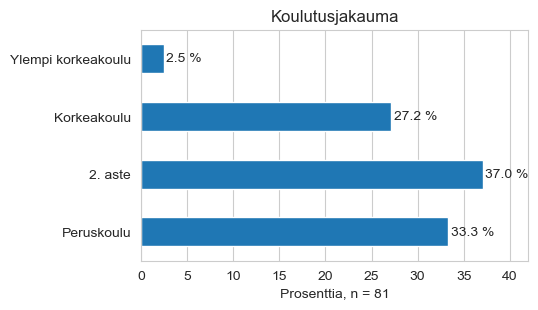

In [10]:
ax = df2['%'].plot(kind='barh', figsize=(5, 3))

plt.title('Koulutusjakauma')
plt.xlabel(f'Prosenttia, n = {str(df2["f"].sum())}')
plt.grid(axis='y')
plt.xlim(0, 42)

ax.bar_label(ax.containers[0], padding=2, fmt='{:.1f} %')

### Kaavion tallennus

Kun tallennat kaavion **savefig**-funktiolla, niin tarkkaan ottaen tallennat kuvion (**figure**), jonka sisällä kaavio on. Kuvioon pääsen käsiksi **plt.gcf**-funktiolla (get current figure).

Ilman parametria `bbox_inches='tight'` osia kaavion reunoilta voi jäädä tallentumatta.

Tallennusmuoto määräytyy  tiedostonimen tarkentimen (esimerkiksi **.png**) perusteella. Mahdolliset tallennusmuodot selviävät komennolla `plt.gcf().canvas.get_supported_filetypes()`

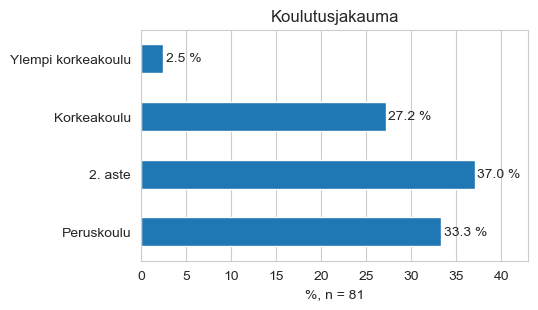

In [11]:
ax = df2['%'].plot(kind='barh', figsize=(5, 3))

plt.title('Koulutusjakauma')
plt.xlabel(f'%, n = {str(df2["f"].sum())}')
plt.grid(axis='y')
plt.xlim(0, 43)

ax.bar_label(ax.containers[0], padding=2, fmt='{:.1f} %')

# Tallennus.
plt.gcf().savefig('testi1.png', bbox_inches='tight')

### Lisätietoa

Tässä muistiossa kukin kaavio sisältää vain yhden arvosarjan. Seuraavassa osassa perehdytään usean arvosarjan kaavioihin:

- [Usean arvosarjan pylväskaaviot](https://github.com/taanila/kaaviot/blob/master/matplotlib2.ipynb)

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.